<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# Tarea Semanal 1

*Roman Ordoñez*

### Consignas
1. Analizar la impedancia de entrada desde el nodo Vx. Hallar los valores de R4,R5,Y1,Y2 e Y3 de tal manera que responda como un Inductor de valor unitario.
2. Obtener la función transferencia $\frac{V2}{V1}$. Desnormalice convenientemente en frecuencia e impedancia para garantizar una $f_0 =10kHz$ y $Q=20$ utilizando Capacitores entre **1nF** y **100 nF**. Para los resistores no hat restricciones
3. Simule la **transferencia desnormalizada** en *Python*. Se sugiere programar la **transferencia normalizada** y definir las normas de frecuencia e impedancia para desnormalizar. Verificar los requerimientos pedidos en 2.

### Punto 1

Para la realizacion de este punto se aplico ley de Kirchhoff para las corrientes de las ramas.

<img src="ts1_1.jpeg" width="500">

<img src="ts1_2.jpeg" width="500">

Como queda determinado en lo hecho, la impedancia de entrada es $Z_en=\frac{Z_1 Z_3 R_5}{Z_2 R_4}$, con lo cual si buscamos un inductor unitario debemos de tener una $R_1$, $R_2$ y $C_2$. 

Ahora para que sea $L_{eq} =1$, una solucion seria que $C_2 = 1nF$ y $R_1=R_3=R_5=1k\ohm$

### Punto 2

Para obtener la transferencia $H(s)$, l que propuse fue dividirla por partes: 
\begin{equation}
H(s) = \frac{V_2}{V_x}*\frac{V_x}{V_1}
\end{equation}

<img src="ts1_3.jpeg" width="500">

<img src="ts1_4.jpeg" width="500">

Como se puede apreciar de la transferencia, estamos ante un *filtro pasa banda*, con una ganancia $K=(1+\frac{R4}{R5})$

<img src="ts1_5.jpeg" width="500">

Mediante las ecuaciones de diseño y las normalizaciones de impedancia y de frecuencia, se obtiene una trasferencia
\begin{equation}
T(s) = 10*\frac{s\frac{1}{Q}}{s^2+s\frac{1}{Q}+1}
\end{equation}

Ademas, se logra calcular la red desnormalizada con las condiciones dadas en el enunciado y un valor para capacitores de $C'=1nF$

### Punto 3

*No entendi muy bien este punto, espero haberlo realizado correctamente*

/home/roman/entorno_virtual/lib/python3.12/site-packages/scipy/signal/_ltisys.py:599: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


TransferFunctionContinuous(
array([3141.59265359,    0.        ]),
array([1.00000000e+00, 3.14159265e+03, 5.19715352e+18]),
dt: None
)

<IPython.core.display.Math object>

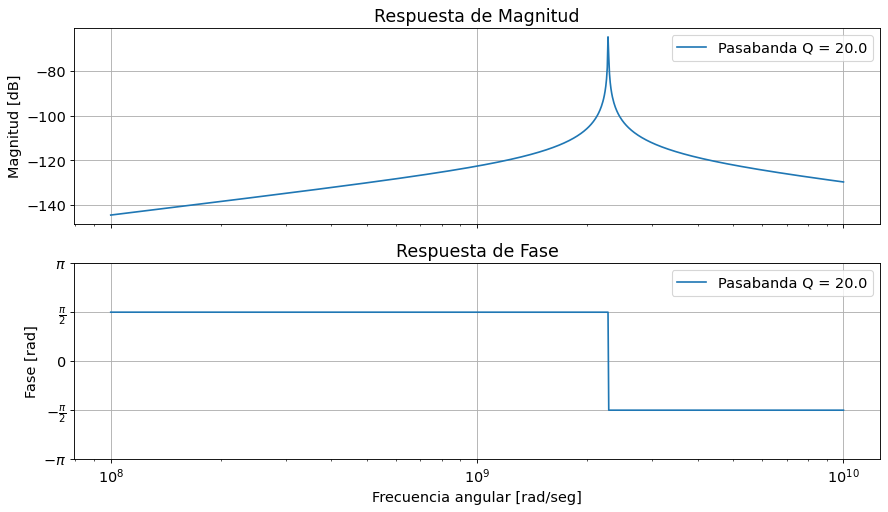

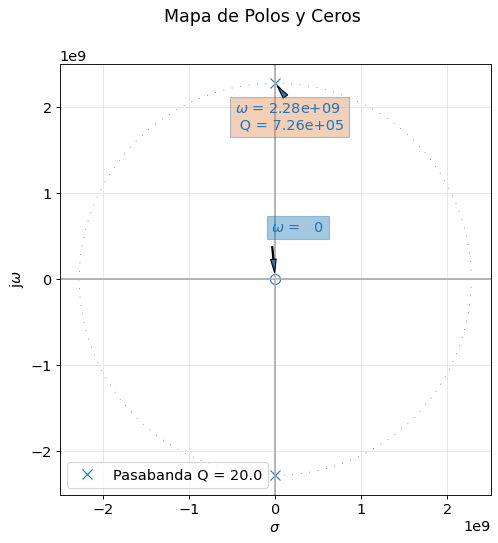

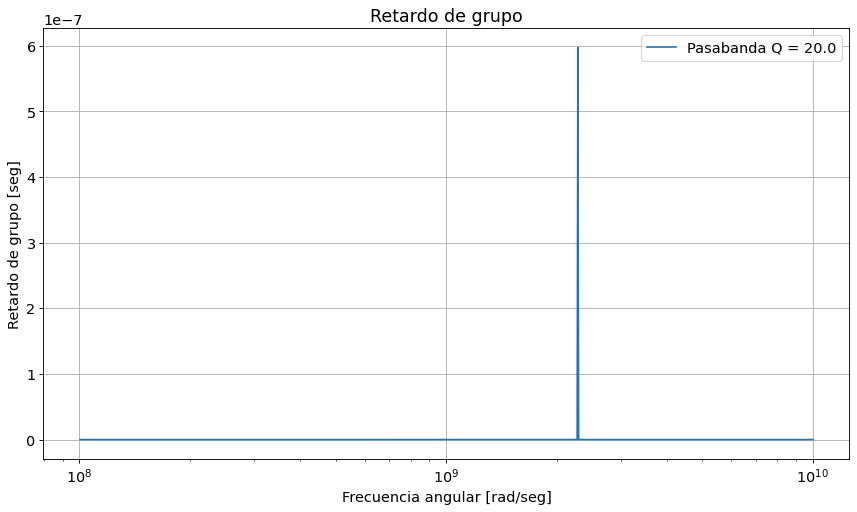

In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# módulo de SciPy
from scipy import signal as sig

# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

from pytc2.sistemas_lineales import analyze_sys, bodePlot, pzmap, pretty_print_bicuad_omegayq
from pytc2.general import print_latex, a_equal_b_latex_s

#Parametros ya dados
f0 = 10e3
normalizacion_frec = 2*np.pi*f0
C_des= 1e-9
Q = 20

#Componentes normalizados
C = C2 = 1
R = Q
R1 = R4 = 9
R3 = R5 = 1

#normalizacion de impedancia
normalizacion_z = C/(C_des * normalizacion_frec)

#desnormalizacion de componentes
C2_des = C_des
R_des = Q * normalizacion_z
R1_des = R4_des = 9 * normalizacion_z
R3_des = R5_des = 1 * normalizacion_z

num = np.array([0,1/(C_des * R_des),0])
den = np.array([1,1/(C_des * R_des),(R4_des/C_des * C_des * R1_des * R3_des * R5_des)])
    
H1 = sig.TransferFunction(num, den)
display(H1)
print_latex(a_equal_b_latex_s('H_d(s)', pretty_print_bicuad_omegayq(num,den,displaystr=False)))
_ = analyze_sys([H1],sys_name = 'Pasabanda Q = {:3.1f}'.format(Q))